In [1]:
what_were_covering = {1: "data (prepare and load)",
                        2: "build model",
                        3: "fitting the model to data(training)",
                        4: "making predictions and evaluating a model(inference)",
                        6: "putting it all together"}

In [2]:
import torch as t
from torch import nn
import matplotlib.pyplot as plt # vizualiation
import numpy as np

## 1. Data(prepering and loading)

Data can be anything... in ML.

* Excel spearsheet
* Images
* Videos
* Audio
* DNA
* Text

ML is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in numbers **bold text**

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = t.arange(start, end, step).unsqueeze(dim=1) # need unsqueeze for model
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Spliting data into trainig and test sets

In [4]:
#Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
# Data visualization
def plot_prediction(train_data = X_train,
                    train_labels=y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions=None):
  plt.figure(figsize=(10,7))

  # Plot traing data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="trainig data")

  # Plot test data in gree
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

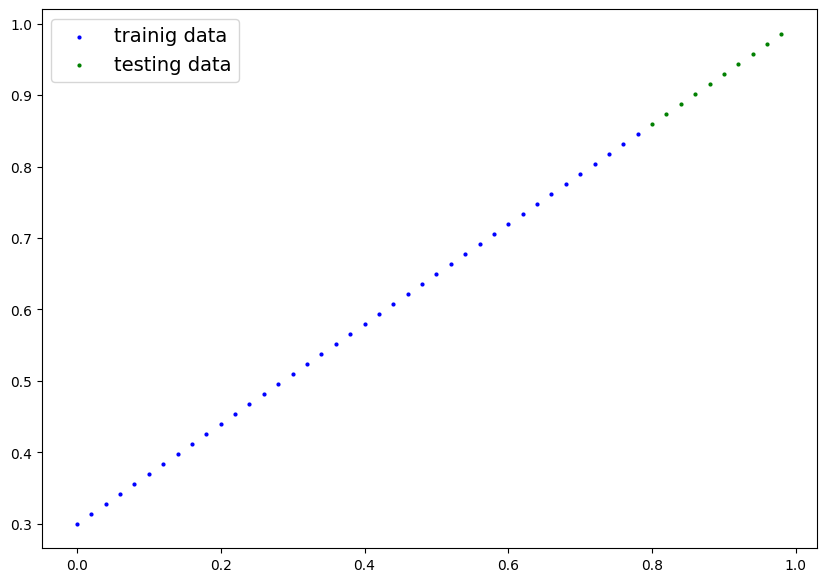

In [6]:
plot_prediction()

## 2. Build model

What the model deos:
* Start with random values(weight and bias)
* Look at training data and adjust the random values to better represnet the ideal values

How does it do it:
1. Gradient descent
2. Backpropagation

In [7]:
from torch import nn

# Create a lin reg model class
class LinearRegressionModel(nn.Module): # <- almost everything in PT inherates from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(t.randn(1, # start with a random weight and try to adjust it to the ideal weight, do not have to be one
                                        requires_grad=True, # can this parameter be updated via GD
                                        dtype=t.float)) # PT datatype t.float32
    self.bias  = nn.Parameter(t.randn(1,
                                        requires_grad=True,
                                        dtype=t.float))


  # Forward method to define the computation in the model
  def forward(self, x: t.Tensor) -> t.Tensor: # <- 'x' is the input data
    return self.weights * x + self.bias

### PT model building essentials
https://pytorch.org/tutorials/beginner/ptcheat.html


* torch.nn - contains all of the bulding for computation graphs(nn)
* torch.nn.Parameter - what parameters should our model try and learn, often a PT layer from torch.nn will set the these for us
* torch.nn.Modlue - the base class for all nn modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers is PT live, they will hepl with GH
* def forward() - all nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computatoin

### Checking the contents of our PT model

We can check our model parameters or whats inside our model using `.parameters()`

In [8]:
# Create a random seed
t.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
# ideal values, teh random values above need to be those
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predictes `y_test` based on `X_test`.

When we pass data through our model, it's going to run it thourgh the forward() methods

In [11]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [12]:
y_pred = model_0(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [13]:
# Make prediction wtih model
with t.inference_mode(): # disables gradient tracking making it faster
  y_pred = model_0(X_test)

# You can also do something similar with torch.no_grad(), however inference_mode() is preferred
# with t.no_grad():
#   y_preds = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [14]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

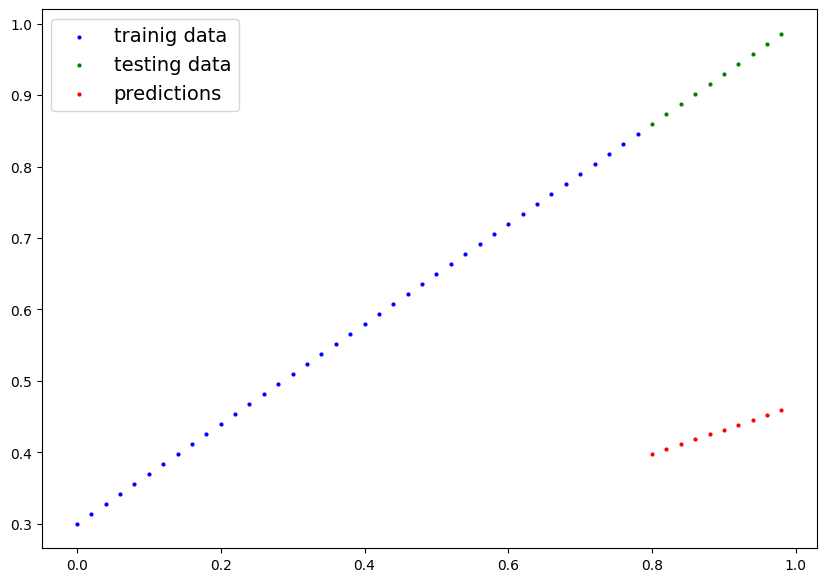

In [15]:
# random values there for bad predictions
plot_prediction(predictions=y_pred)

## 3. Train model

The whole idea of trainig is for am model to move from *unknown* parameters to some *known* parameters

In other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss(cost) function.

Things we need to train:
* **Loss fucntion:** A function to measue how wrong your model's prediction are to the ideal outputs, lower better./ https://pytorch.org/docs/stable/nn.html#loss-functions
* **Optimizer:** Takes into accunt the loss of a model and adjusts the model's parameters to improve the loss fucntion. https://pytorch.org/docs/stable/optim.html



And specifically for PT, we need:
* A training loop
* A testing loop

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
# Check model's parameters(parameters is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
# Set up a loss fucntion
loss_fn = nn.L1Loss()

# Set up an optimizer(stochastic GD)
optimizer = t.optim.SGD(params=model_0.parameters(), # model parameters to optimize
                    lr = 0.01) #lr = learning rate = hyperparameter

In [19]:
loss_fn

L1Loss()

In [20]:
t.optim.SGD

torch.optim.sgd.SGD

### Building a trainig and testing loop in PyTorch

A couple of things we need in a traing loop:
0. Loop through the data
1. Forward pass (this involves data moving thorught our model's `forward()` function) to mkae prediction on data = faorward proparagion
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Oprimizer zero grad
4. Loss backward - move backwards thrugh the netwrok to calculate the gradients of each of the parameters of our model with the respect to the losss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust the parameters to try and imporeve the loss (GD)

In [21]:
# An epoch is one loop through the data ...(this is a hyperparemeter becease we've set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### TRAINING
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to trainig mode
  model_0.train() # train mode in PT sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train) # input, target
  #print(f"Loss: {loss}")

  # 3. Optimizer zero grad(they accumulate by deafult)
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model (calculate gradients of each parameter)
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # to update the model's parameters with respect to the gradeints calcualtes by loss.backward()

  ### Testing
  model_0.eval() # turns off things not needed for testing(evaluation)
  with t.inference_mode(): # turns off gradeint tracking & caouple more thigns behind the scence
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss on the test data set
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [22]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(

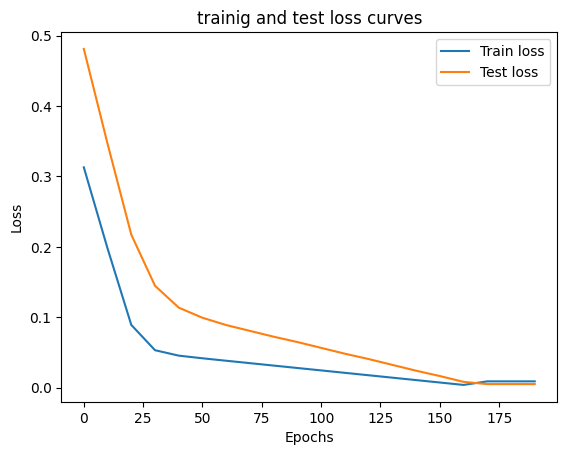

In [23]:
# Plot the loss curves
plt.plot(epoch_count, np.array(t.tensor(loss_values).cpu().numpy()), label="Train loss") # matplotlib does not work with tensors so u need to change it to np
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("trainig and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [24]:
with t.inference_mode(): # disables gradient tracking making it faster
  y_pred_new = model_0(X_test)

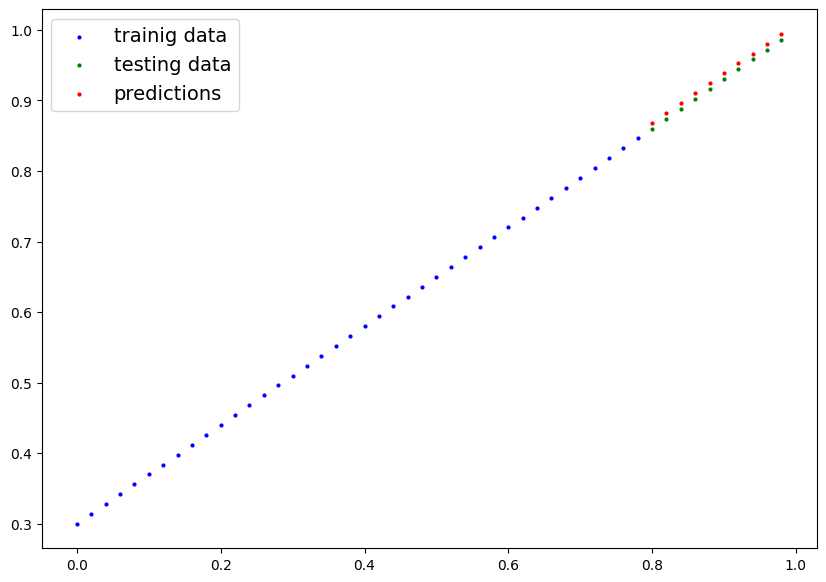

In [25]:
plot_prediction(predictions=y_pred_new)

## Saving a model in PyTorch

There are three mina methods for saving and loading models in PyTorch.

1. `torch.save() `- save PT object in Python's pickle format
2. `torch.load()` - allows you to laod a save PT object
3. `torch.nn.Modlu.load_state_dict()` - this allos to load a model's saved state dict

In [26]:
# Saving our PT model
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_model_0.pth" # .pt or .pth for saving PT models
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
t.save(obj=model_0.state_dict(),
       f=MODEL_SAVE_PATH)

## Loading a PyTorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saeve stat_dict() into that.

In [27]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [28]:
# To load in a save state_dict we need to instatniate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will upade the new instance with updated parameters)
loaded_model_0.load_state_dict(t.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [29]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [30]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with t.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [31]:
# Make some models preds
model_0.eval()
with t.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [32]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one palce.

In [33]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PT version
torch.__version__

'2.1.0+cu118'

Create device-agnostic code.

This means if we've got an acess to GPU, our coe will use it

If no GPU is avaible, the code will deful to useing CPU.

In [34]:
# Set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [35]:
!nvidia-smi

Sun Nov  5 21:29:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 6.1 Data

In [36]:
# Create soem data usiong the linear regression formula of y = weight * x + bias
weight = 0.4
bias = 0.1

# Create range values
start = 0
end = 1
step = 0.02

# Create the X and y (features and labels), X is a feature matrix and that's why it is capital
X = torch.arange(start,end,step).unsqueeze(dim=1) # without unsqueeze, erros will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.1000],
         [0.1080],
         [0.1160],
         [0.1240],
         [0.1320],
         [0.1400],
         [0.1480],
         [0.1560],
         [0.1640],
         [0.1720]]))

In [37]:
# spli data
traing_split = int(0.8 * len(X))
X_train, y_train = X[:traing_split], y[:traing_split]
X_test, y_test = X[traing_split:], y[traing_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [38]:
# Data visualization
def plot_prediction(train_data = X_train,
                    train_labels=y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions=None):
  plt.figure(figsize=(10,7))

  # Plot traing data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="trainig data")

  # Plot test data in gree
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

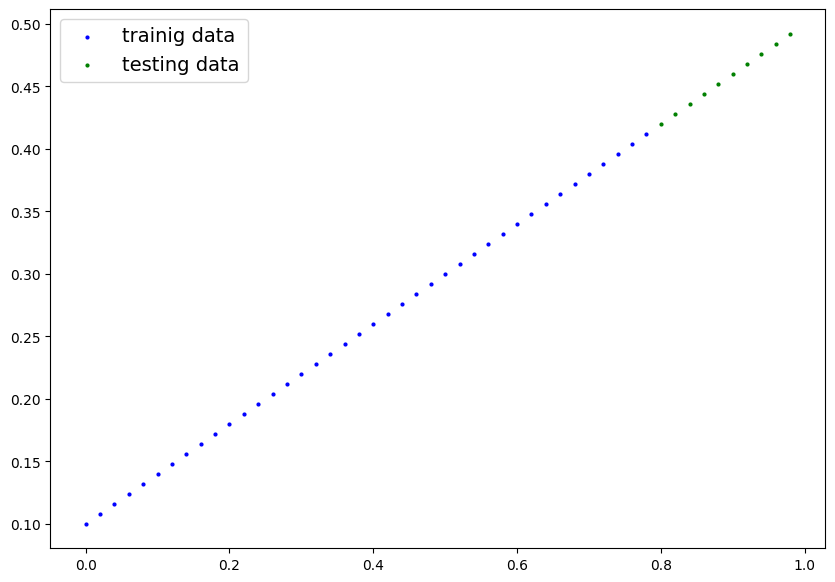

In [39]:
# Plot the data
plot_prediction(X_train, y_train, X_test,y_test)

### 6.2 Building a PyTorch Linear Model


In [40]:
# Create a linear model by sublcassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features =1,
                                  out_features = 1)


  def forward(self, x: torch.Tensor) -> torch.Tensor: # x --> input data(torch tensor) and the output also has to be an torch tensor
    return self.linear_layer(x)


# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [41]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [42]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training the model

For traiing we need:
* Loss fucntion
* Optimizer
* trainig loop
* testing loop

In [43]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAR

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01) # how big of a set is the optimzier going to change our values

In [44]:
# Trainig loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for date)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    # Print out whats happedning

    if epoch % 10 ==0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.8721778988838196 | Test loss: 1.0409762859344482
Epoch: 10 | Loss: 0.756968080997467 | Test loss: 0.9062663912773132
Epoch: 20 | Loss: 0.641758143901825 | Test loss: 0.771556556224823
Epoch: 30 | Loss: 0.5265483260154724 | Test loss: 0.6368467211723328
Epoch: 40 | Loss: 0.4113384187221527 | Test loss: 0.5021368861198425
Epoch: 50 | Loss: 0.2961285710334778 | Test loss: 0.3674270808696747
Epoch: 60 | Loss: 0.18091867864131927 | Test loss: 0.23271720111370087
Epoch: 70 | Loss: 0.06570865213871002 | Test loss: 0.09800722450017929
Epoch: 80 | Loss: 0.011952430009841919 | Test loss: 0.02744966186583042
Epoch: 90 | Loss: 0.008513589389622211 | Test loss: 0.019177231937646866
Epoch: 100 | Loss: 0.0050748055800795555 | Test loss: 0.01090479176491499
Epoch: 110 | Loss: 0.001640075701288879 | Test loss: 0.0033192397095263004
Epoch: 120 | Loss: 0.008293048478662968 | Test loss: 0.005432430189102888
Epoch: 130 | Loss: 0.008293048478662968 | Test loss: 0.005432430189102888
Epoch:

In [45]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4005]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.0915], device='cuda:0'))])

In [46]:
weight, bias

(0.4, 0.1)

### 6.4 Making and evaluating predictions

In [47]:
# Turin model into evaluation mode
model_1.eval()

# make prediction on the test data (inference = predictions)
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.4119],
        [0.4199],
        [0.4279],
        [0.4359],
        [0.4440],
        [0.4520],
        [0.4600],
        [0.4680],
        [0.4760],
        [0.4840]], device='cuda:0')

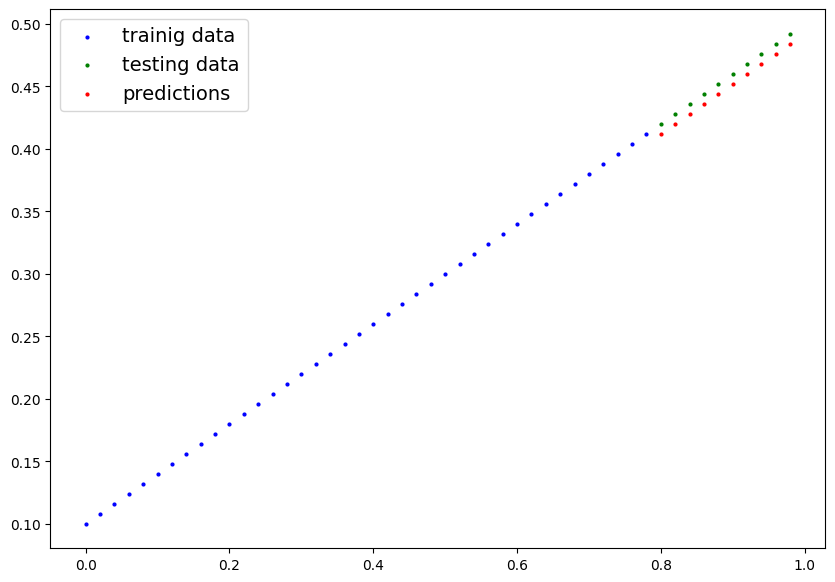

In [48]:
# Check out our model rpedictions visually
plot_prediction(predictions = y_preds.cpu()) # .cpu() since we made the thing go to gpu and matplotlib works with numpy which works on the cpu

### 6.5 Saving and loading a trained model

In [49]:
# Saving our PT model
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_model_1.pth" # .pt or .pth for saving PT models
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
torch.save(obj=model_1.state_dict(),
       f=MODEL_SAVE_PATH)

In [50]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4005]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.0915], device='cuda:0'))])

In [51]:
# Load a PyTorch mode

# Create a new instance
loaded_model_1 = LinearRegressionModelV2()

# Load the save model_1 state_dixt
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [52]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [53]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4005]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.0915], device='cuda:0'))])

In [54]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')